### Importing Libraries and load Dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("A:/EDA Projects/bike_dataset.csv")

In [3]:
data.shape

(361, 9)

In [4]:
data.head()

,model_name,price,CC,mileage,type_of_bike,weight_in_kg,links,acceleration_speed,top_speed
0,Gravton Motors Quanta,99000,NaN,320.0,Electric Bike,100,https://www.carandbike.com/gravton-motors-bike...,4.2,70.0
1,Simple Energy One,109999,NaN,236.0,Electric Bike,110,https://www.carandbike.com/simple-energy-bikes...,3.6,100.0
2,Okaya Classiq,69900,NaN,200.0,Electric Bike,95,https://www.carandbike.com/okaya-bikes/classiq,NaN,25.0
3,Oben Electric Rorr,102999,NaN,200.0,Electric Bike,120,https://www.carandbike.com/oben-electric-bikes...,3.0,100.0
4,Ola Electric S1,85099,NaN,181.0,Electric Bike,121,https://www.carandbike.com/ola-electric-bikes/s1,2.9,116.0


### Data Types

In [5]:
data.dtypes

model_name             object
price                   int64
CC                    float64
mileage               float64
type_of_bike           object
weight_in_kg            int64
links                  object
acceleration_speed    float64
top_speed             float64
dtype: object

In [6]:
data.describe()

,price,CC,mileage,weight_in_kg,acceleration_speed,top_speed
count,3.610000e+02,304.000000,361.000000,361.000000,170.000000,200.000000
mean,8.399079e+05,680.973684,44.681413,178.839335,4.193412,99.338650
std,1.052083e+06,547.744364,39.890270,73.839516,2.369334,39.631992
min,3.800000e+04,87.800000,8.000000,55.000000,1.010000,25.000000
25%,1.000000e+05,164.425000,20.000000,118.000000,2.800000,79.500000
50%,2.420000e+05,618.000000,30.000000,169.000000,3.215000,100.000000
75%,1.459000e+06,1051.500000,55.000000,216.000000,5.075000,129.115000
max,7.990000e+06,2458.000000,320.000000,433.000000,13.800000,200.000000


### Checking for Missing Values

In [7]:
data.isna().sum()

model_name              0
price                   0
CC                     57
mileage                 0
type_of_bike            0
weight_in_kg            0
links                   0
acceleration_speed    191
top_speed             161
dtype: int64

### Visualizing Missing Values

<AxesSubplot:>

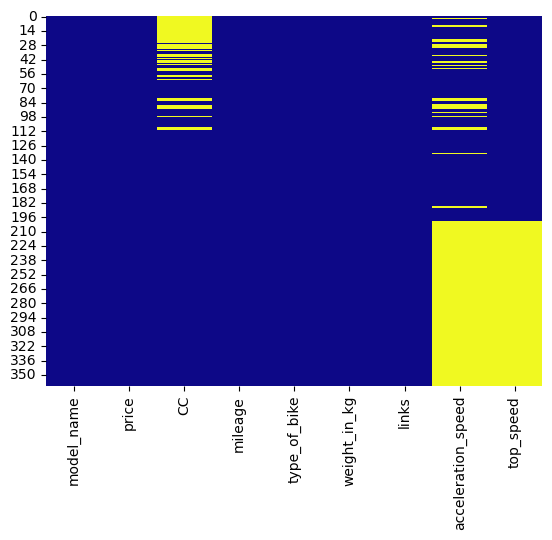

In [8]:
sns.heatmap(data.isna(), cbar=False, cmap='plasma')

We can see that there are more missing values in acceration_speed and top_speed

### Replacing the missing values

In [9]:
cols = ['CC', 'acceleration_speed', 'top_speed']
for col in cols:
    data[col] = pd.to_numeric(data[col])
    data[col].fillna(data[col].mean(), inplace=True)

In [10]:
data.head()

,model_name,price,CC,mileage,type_of_bike,weight_in_kg,links,acceleration_speed,top_speed
0,Gravton Motors Quanta,99000,680.973684,320.0,Electric Bike,100,https://www.carandbike.com/gravton-motors-bike...,4.200000,70.0
1,Simple Energy One,109999,680.973684,236.0,Electric Bike,110,https://www.carandbike.com/simple-energy-bikes...,3.600000,100.0
2,Okaya Classiq,69900,680.973684,200.0,Electric Bike,95,https://www.carandbike.com/okaya-bikes/classiq,4.193412,25.0
3,Oben Electric Rorr,102999,680.973684,200.0,Electric Bike,120,https://www.carandbike.com/oben-electric-bikes...,3.000000,100.0
4,Ola Electric S1,85099,680.973684,181.0,Electric Bike,121,https://www.carandbike.com/ola-electric-bikes/s1,2.900000,116.0


## Visulalizations 

### How does the Accleration Speed affect Top Speed?

Text(0, 0.5, 'Top Speed')

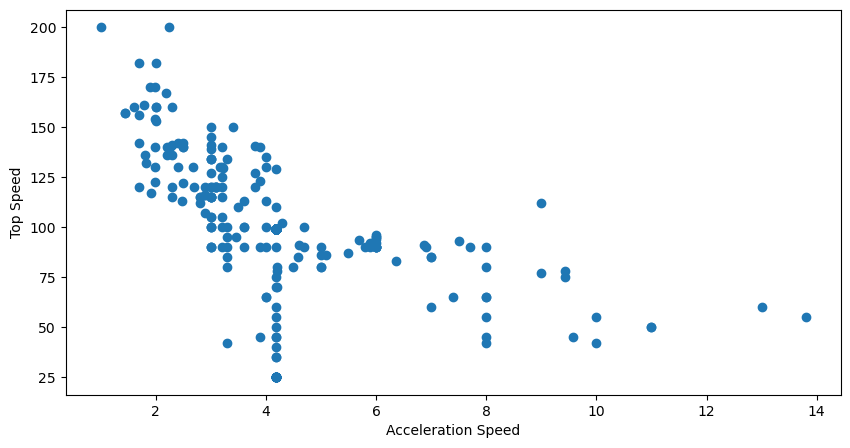

In [11]:
plt.figure(figsize=(10,5))
plt.scatter(x='acceleration_speed', y='top_speed', data=data)
plt.xlabel('Acceleration Speed')
plt.ylabel('Top Speed')

We can observe from the plot that most of the accelration speed lies between 2-4 has top speed between 75-175, there are ouliers also between(10-14)  

### Univariate Analysis of top speed

<AxesSubplot:xlabel='top_speed', ylabel='Count'>

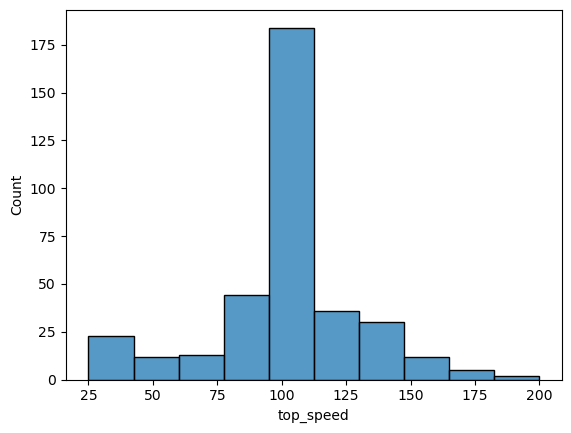

In [12]:
sns.histplot(data.top_speed, bins=10)

The top speed is around 100

### What is the relation between cc and price?

Text(0, 0.5, 'Price')

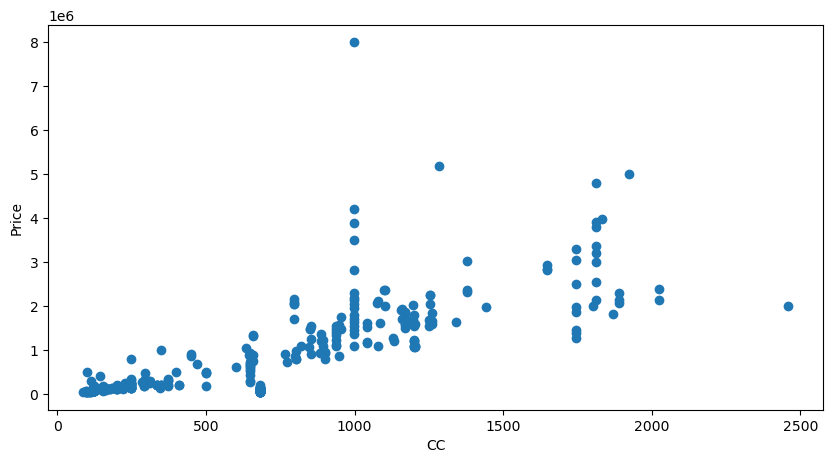

In [13]:
plt.figure(figsize=(10,5))
plt.scatter(x='CC',y='price',data=data)
plt.xlabel('CC')
plt.ylabel('Price')

We can see from the plot that as the cc increases price increases in a linear manner and three outlier between(2000-2500)

### Relation between type of bike and weight

In [14]:
data.type_of_bike.value_counts()

Petrol Bike      304
Electric Bike     57
Name: type_of_bike, dtype: int64

<AxesSubplot:xlabel='weight_in_kg', ylabel='type_of_bike'>

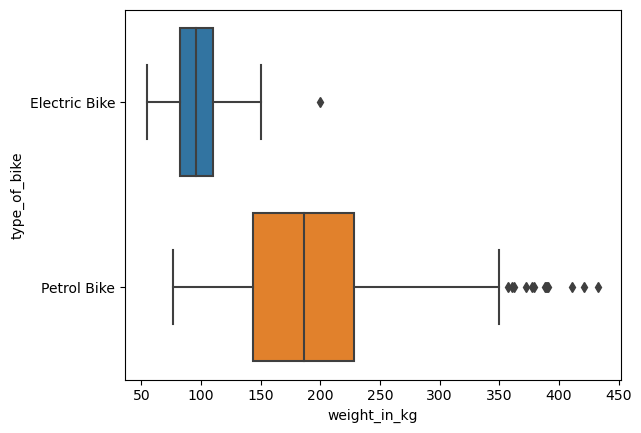

In [15]:
sns.boxplot(x='weight_in_kg', y='type_of_bike', data=data)

With the boxplot, we can conclude that the average weight of petrol bike is 180 kg, and the average weight of a pelectric bike is 100kg